<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/%5BE_02%5DClassification_of_Digits%26Wine%26Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Digits, Wine, and Breast Cancer

Dataset provided by `sklearn.datasets`

The classification is done with the following steps:
1. Grab the data from `sklearn.datasets` with load_* method.
2. Look into the data with `Feature Data, Label Data, Target Names, and Describe`.
3. Create train dataset and test dataset by using `from sklearn.model_selection.train_test_split`
4. Try various classification models and pick one of them
  - Decision Tree
  - Random Forest
  - SVM
  - SGD Classifier
  - Logistic Regression
5. Analyze the classificatoin results from each model, and choose appropriate `classification metrics`: which is `confusion matrix` and `classification report`. 


# Data Preparation
Import the packages and load the datasets from sklearn.datasets

In [ ]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
digits = load_digits()
wine = load_wine()
breast_cancer = load_breast_cancer()

## EDA: Look into the dataset

### (1) Digits
Check the data inside `digits` dataset and check the shape, target information, and features.

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [ ]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


In [ ]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

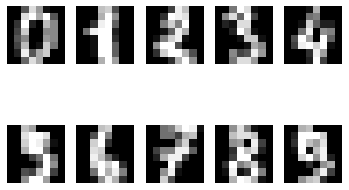

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

### (2) Wine
Check the data inside `wine` dataset and check the shape, target information, and features.

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

It looks like there are 13 different measurements in the 3 types of wine. Those 13 attributes can be found from the above summary statistics.   
   
First I will look at the same basic stuff that I've done above with the `Digits` dataset.


In [ ]:
print(dir(wine))
wine.keys()

wine_data = wine.data
print(wine_data.shape)

wine_data[0]

wine_label = wine.target
print(wine_label.shape)
wine_label

wine.target_names


['DESCR', 'data', 'feature_names', 'target', 'target_names']
(178, 13)
(178,)


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Let's plot this to have a better understanding on this dataset.
I found from the official document that they provide parameter `return_X_y` boolean variable that returns `(data, target)` instead of a bunch object. It says it is a pandas DF with appropriate dtypes.    
I want to try drawing a graph using this DataFrame.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

X, y = load_wine(return_X_y=True)

X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine_data_features = pd.DataFrame(X, columns=[str(i) for i in range(13)])
wine_data_features


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
wine_data_features.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Here I can see they have quite different means, which shows that I can distinguish these 3 types of wines without any further preprocessing! Great.   
However, l need to keep in mind that the column 13 had much larger scale than the values from the other columns.

### (3) Breast Cancer

Check the data inside `breast_cancer` dataset and check the shape, target information, and features.

In [ ]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

There are 30 attributes, and I also see that the column 'area(mean)' and 'area(wors)' has different scale to compare with the rest of the others. Also, this dataset has the most number of parameters. Let's check how this will impact the models below.

In [ ]:
print(dir(breast_cancer))
breast_cancer.keys()

breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

breast_cancer_data[0]

breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

breast_cancer.target_names


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(569, 30)
(569,)


array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df_features = pd.DataFrame(breast_cancer_data, columns = breast_cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The data has no null value and clean. I don't need to clean the dataset.
Here I also want to check how many data for each target.

In [ ]:
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

I will add the target column into the features dataframe.

In [ ]:
new_df = pd.concat([df_features, df_target], axis=1)
new_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Target')

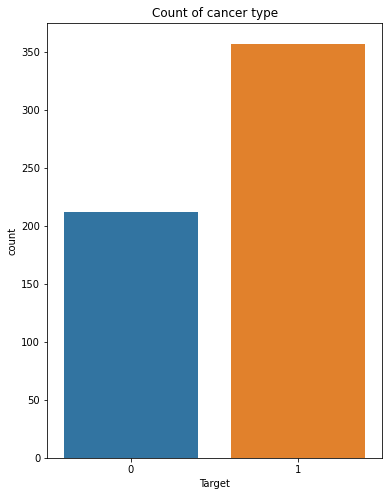

In [131]:
plt.figure(figsize=(6,8))
plt.title('Count of cancer type')
target_df = new_df['target']
sns.countplot(target_df, x='target')
plt.xlabel("Target")

There comes the warning that I did not specify x, and y for the countplot.    
I will keep in mind that this will be deprecated, and just continue now.

This means that There are 212 count of Malignant, and 357 count of Benign data.

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
cancer_data_features = pd.DataFrame(X, columns=breast_cancer.feature_names)
cancer_data_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Also I want to take a look at the distribution of the data.   
Since this dataset has 30 attributes, which is the most number of the attributes, I want to see if there is if there is a correlated attributes (dependant to each other).    
   
I will draw a violin plot to visualize them. I will use StandardScaler to draw the violing plot.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer_data_features)

cancer_features_scaled = scaler.transform(cancer_data_features)
cancer_features_scaled = pd.DataFrame(data=cancer_features_scaled,
                               columns=cancer_data_features.columns)

cancer_df_scaled = pd.concat([cancer_features_scaled, new_df['target']], axis=1)
cancer_df_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


I will unpivot this plot with pd.melt function from wide to long format.    
By following pandas' official doc,    
> "This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’. (pandas official doc)

In [ ]:
cancer_df_scaled_melt = pd.melt(cancer_df_scaled, id_vars='target',
                         var_name='features', value_name='value')
cancer_df_scaled_melt.head(10)

,target,features,value
0,0,mean radius,1.097064
1,0,mean radius,1.829821
2,0,mean radius,1.579888
3,0,mean radius,-0.768909
4,0,mean radius,1.750297
5,0,mean radius,-0.476375
6,0,mean radius,1.170908
7,0,mean radius,-0.118517
8,0,mean radius,-0.320167
9,0,mean radius,-0.473535


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

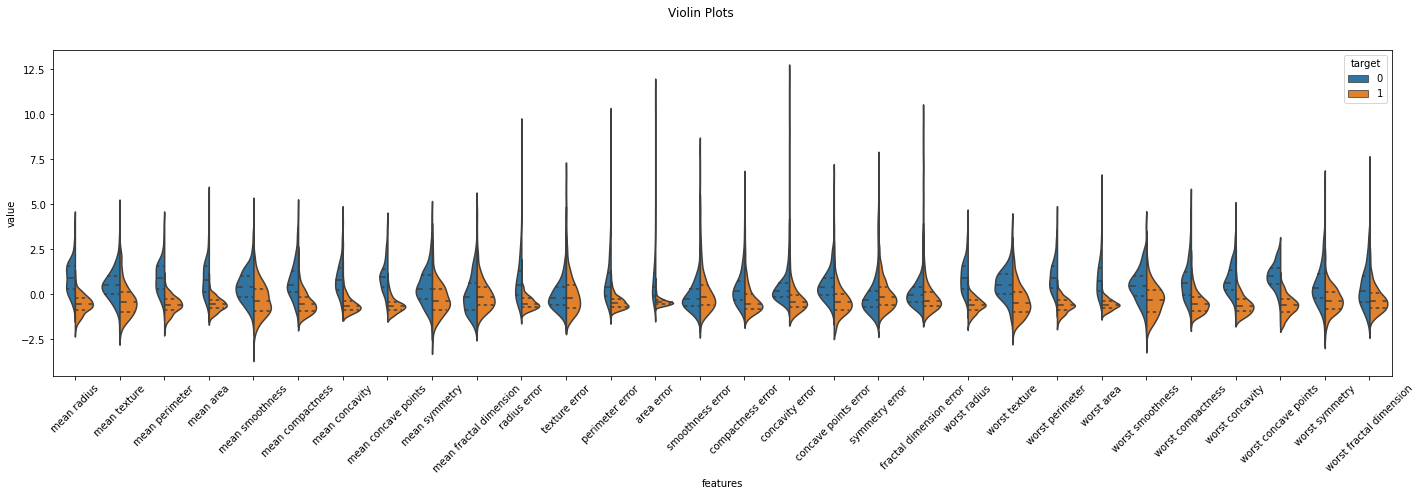

In [ ]:
plt.figure(figsize=(24, 6))
plt.suptitle('Violin Plots')

sns.violinplot(x='features', y='value', hue='target', data=cancer_df_scaled_melt, split=True, inner="quart")

plt.xticks(rotation=45) # added this option because the x-labels were not visible.

I set `split=True` to have a splitted view of the violin plot, to see the correlation more clearly.   
   
From the above plot, I got an insight form the data that some features have similar distributions: the continuous attributes with similar names has the similar distributions.   
If you look at the graph for `mean permimeter and mean area`, it looks really similar. Also, `mean concavity and mean concave points` has the similar distribution.   


To see the correlations more visually, I will draw a heatmap.

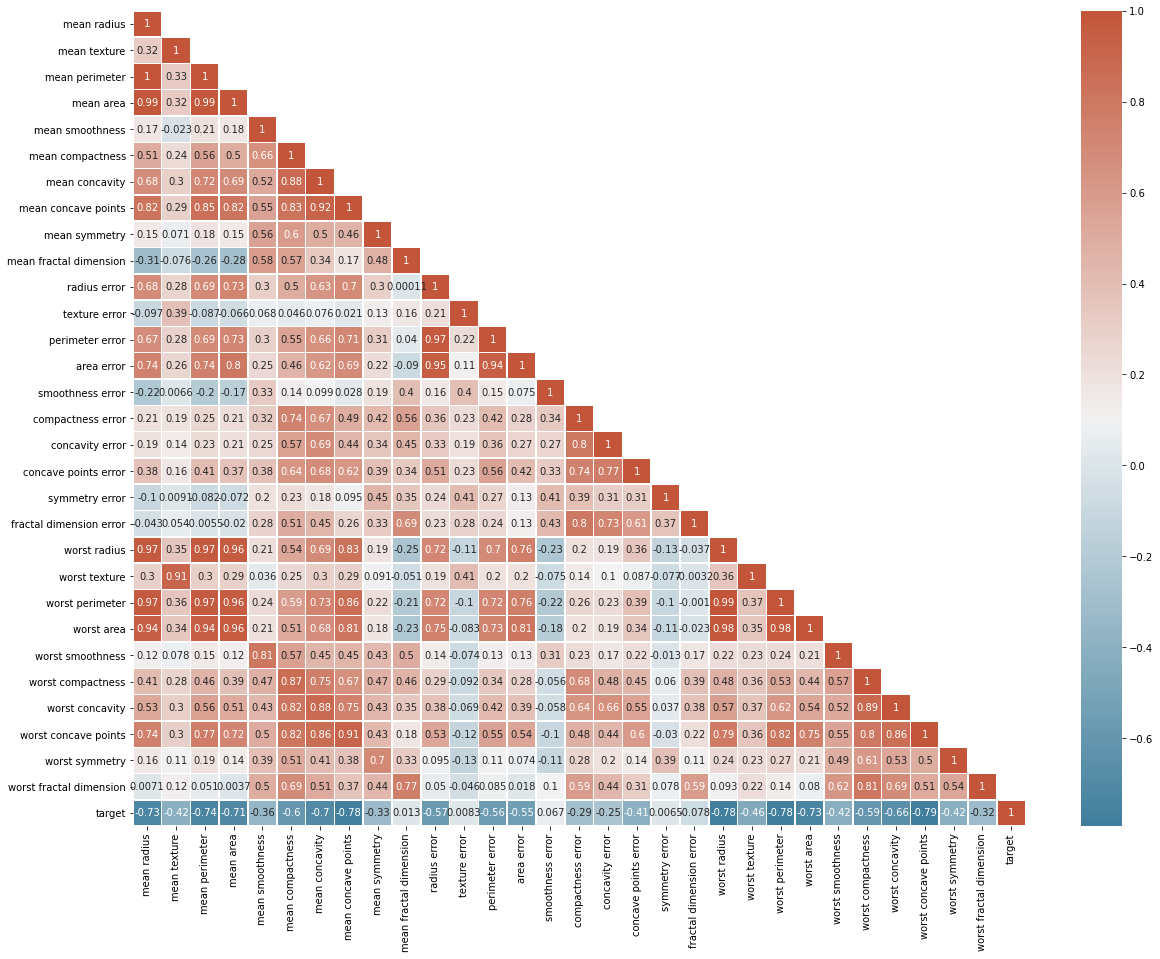

In [ ]:
plt.figure(figsize=(20, 15))
df_corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, linewidths=.5, annot=True )

Those highly correlated values will impact the learning models, so we should not include them altogether.  
This means that we need a `feature selection` works to do before we train the model.   
I will compare how diffrent the results are for `feature selected dataset and the plain dataset` below.    
   
I first got a sense about the feature selection while I was discussing this topic with the classmates in gather.io studyroom. So I got an interests on searching further on the possible methods, and I found `Univariate Feature Selection with SelectKBest` would be useful in this situation since I am performing a Supervised Learning. (Also added the link for this article I referenced in the `References` section at the bottom of this jupyter notebook.   
By searching further about this `SelectKBest`, I read that using the `Chi-Squared test` for feature selection is considered as a good fit to each other since the attributes is any way can be thought as `categorical`. I will also leave a copy of a sentence I read from this `chi-squared-test article` I've found helpful. I left the source of this article in the References section.      
> "It measures the degree of association between two categorical variables. If both are numeric, we can use Pearson’s product-moment correlation, and if the attribute is numerical and there are two classes we can use a t-test if more than two classes we can use ANOVA".  (Medium article - Dr. Saptarsi Goswami, Nov 13, 2020)


But I am still not confident about how many features I need to select here. I will leave this as my further TODO-study list and just choose 10 for K here. (This is simply I divided 30 attributes by 3).

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(score_func=chi2, k=10)
feature_selection.fit(cancer_data_features, df_target)
selected_features = cancer_data_features.columns[feature_selection.get_support()]
print("The ten selected features: ", list(selected_features))


The ten selected features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


For this selected_features: I will use this as a second train set to compare the accuracy with the plain features set.   
I will save this as a variable, `selected_features_cancer_X`.

In [ ]:
selected_features_cancer_x_train = pd.DataFrame(feature_selection.transform(cancer_data_features),columns=selected_features)
selected_features_cancer_y = df_target['target']

## Preprocess the Dataset
Since thoee datasets are already cleaned and no preprocess needed, I will prepare train and test dataset here.


In [ ]:
def helper_check_the_shape(x_train, x_test, y_train, y_test, name_dataset):
  print(name_dataset)
  print('x_train.shape: ', x_train.shape)
  print('x_test.shape: ', x_test.shape)
  print('y_train.shape: ', y_train.shape)
  print('y_test.shape: ', y_test.shape, end='\n\n')

#digits dataset
digits_x_train, digits_x_test, digits_y_train, digits_y_test = train_test_split(digits_data, digits_label, test_size = 0.2, random_state = 15)
helper_check_the_shape(digits_x_train, digits_x_test, digits_y_train, digits_y_test, 'Digits:')

# wine dataset
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 15)
helper_check_the_shape(wine_x_train, wine_x_test, wine_y_train, wine_y_test, 'Wine:')

# plain breast_cancer dataset
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2, random_state = 15)
helper_check_the_shape(cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test, 'Breast Cancer - plain:')

# selected features brease_cancer dataset
selected_cancer_x_train, selected_cancer_x_test, selected_cancer_y_train, selected_cancer_y_test = train_test_split(selected_features_cancer_x_train, selected_features_cancer_y, test_size = 0.2, random_state = 15)
helper_check_the_shape(selected_cancer_x_train, selected_cancer_x_test, selected_cancer_y_train, selected_cancer_y_test, 'Breast Cancer - selected features:')

Digits:
x_train.shape:  (1437, 64)
x_test.shape:  (360, 64)
y_train.shape:  (1437,)
y_test.shape:  (360,)

Wine:
x_train.shape:  (142, 13)
x_test.shape:  (36, 13)
y_train.shape:  (142,)
y_test.shape:  (36,)

Breast Cancer - plain:
x_train.shape:  (455, 30)
x_test.shape:  (114, 30)
y_train.shape:  (455,)
y_test.shape:  (114,)

Breast Cancer - selected features:
x_train.shape:  (455, 10)
x_test.shape:  (114, 10)
y_train.shape:  (455,)
y_test.shape:  (114,)



# Try multiple models


Initialize the models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state = 32)
random_forest = RandomForestClassifier(random_state = 12)
svm = svm.SVC()
sgd = SGDClassifier()
logistic_regression = LogisticRegression(max_iter = 5000)

### Train & Evaluate the Model

I will use `Confusion Matrix` as classification metrics. By using this, I can check other metrics like precision, recall, accuracy, f1 score with the accuracy.   
   
To review each model's confusion matrix and classification report, I will create a helper method for each model and dataset here.

In [106]:
from sklearn.metrics import confusion_matrix

def helper_evaluate(y_test, y_pred):
  # check confusion matrix
  print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
  # check classification_report
  print('classification report: \n', classification_report(y_test, y_pred, labels=np.unique(y_pred)))

#### (1) Digits

##### 1. Decision Tree

In [ ]:
decision_tree.fit(digits_x_train, digits_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
digits_y_pred = decision_tree.predict(digits_x_test)
helper_evaluate(digits_y_test, digits_y_pred)

confusion matrix: 
 [[29  0  0  0  0  0  0  0  2  0]
 [ 0 31  3  1  1  0  1  0  1  0]
 [ 0  1 33  1  0  1  0  0  1  1]
 [ 0  0  0 22  0  1  1  0  2  1]
 [ 0  0  0  1 32  0  4  3  0  1]
 [ 0  0  3  0  0 31  0  0  1  0]
 [ 0  1  2  0  0  1 34  0  0  0]
 [ 0  0  0  1  0  0  0 31  0  2]
 [ 0  2  3  0  0  2  0  0 26  2]
 [ 0  3  2  0  0  2  0  0  2 34]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.82      0.82      0.82        38
           2       0.72      0.87      0.79        38
           3       0.85      0.81      0.83        27
           4       0.97      0.78      0.86        41
           5       0.82      0.89      0.85        35
           6       0.85      0.89      0.87        38
           7       0.91      0.91      0.91        34
           8       0.74      0.74      0.74        35
           9       0.83      0.79      0.81        43

    accuracy              

Precision accuracy is 0.84, looks not bad.   
From the Classification Report, FN and FP has lots of values other than 0, it looks like the model needs some improvement.

##### 2. Random Forest

In [ ]:
random_forest.fit(digits_x_train, digits_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [ ]:
digits_y_pred = random_forest.predict(digits_x_test)
helper_evaluate(digits_y_test, digits_y_pred)

confusion matrix: 
 [[29  0  0  0  2  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  1  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 1  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  0  0  0  0 42]] 

classification report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      1.00      0.99        38
           2       1.00      1.00      1.00        38
           3       0.96      1.00      0.98        27
           4       0.95      0.95      0.95        41
           5       1.00      1.00      1.00        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       1.00      0.94      0.97        35
           9       0.95      0.98      0.97        43

    accuracy              

I see the accuracy gets higher to 0.98. This is much better then the first model: Decision Tree. It's clear that `Random Forest` model is more accurate to compare with `Decision Tree`.   
But still I see there are a few number of FN and FP. I think there are some possibilities that this can be improved in the next models.

##### 3. SVM

In [ ]:
svm.fit(digits_x_train, digits_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
digits_y_pred = svm.predict(digits_x_test)
helper_evaluate(digits_y_test, digits_y_pred)

confusion matrix: 
 [[30  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 42]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy              

This also gives us a high accuracy 0.98 which is the same with the `Random Forest` model, but I see there is '2' of FN.

##### 4. SGD

In [ ]:
sgd.fit(digits_x_train, digits_y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
digits_y_pred = sgd.predict(digits_x_test)
helper_evaluate(digits_y_test, digits_y_pred)

confusion matrix: 
 [[30  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  0 22  0  0  0  0  3  2]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 33  1  0  0  1]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  4  0  0  0  0  0  0 31  0]
 [ 0  1  0  0  0  0  0  3  0 39]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.86      0.97      0.91        38
           2       1.00      0.97      0.99        38
           3       1.00      0.81      0.90        27
           4       0.98      0.98      0.98        41
           5       1.00      0.94      0.97        35
           6       0.97      1.00      0.99        38
           7       0.92      1.00      0.96        34
           8       0.86      0.89      0.87        35
           9       0.93      0.91      0.92        43

    accuracy              

The accuracy is 0.95 which is OK,   
but I see the SGD model's FN and FP has even higher number then the above SVM model.

##### 5. Logistic Regression

In [ ]:
logistic_regression.fit(digits_x_train, digits_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
digits_y_pred = logistic_regression.predict(digits_x_test)
helper_evaluate(digits_y_test, digits_y_pred)

confusion matrix: 
 [[30  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  1  0  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  1  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  1  1  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  1 41]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy              

The result of this `Logistic Regression` model is similar with the `Random Forest` model.   
High accuracy 0.97 with small FN and FP.

#### (2) Wine

##### 1. Decision Tree

In [ ]:
decision_tree.fit(wine_x_train, wine_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
wine_y_pred = decision_tree.predict(wine_x_test)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[12  0  0]
 [ 0 11  1]
 [ 0  2 10]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



The result of 0.92 precision looks good.

##### 2. Random Forest

In [ ]:
random_forest.fit(wine_x_train, wine_y_train)
wine_y_pred = random_forest.predict(wine_x_test)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Result of 1.00 precision seems quite perfect.

##### 3. SVM

In [107]:
svm.fit(wine_x_train, wine_y_train)
wine_y_pred = svm.predict(wine_x_test)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[11  1  0]
 [ 1 11  0]
 [ 2 10  0]] 

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.92      0.65        12

   micro avg       0.61      0.92      0.73        24
   macro avg       0.64      0.92      0.75        24
weighted avg       0.64      0.92      0.75        24



Wow, the result of the accuracy is 0.43. What happened to the accuracy and the f1-score?   
Unlike Decision Tree or Random Forest model, SVM only computes with the distance to the margin. 
랜덤포레스트는 아무 전처리 없이 스케일이 달라도 그대로 데이터를 갖다쓸 수 있지만 svm은 마진으로만 계산하기 때문에 min-max or other scaling is highly recommended at preprocessing step.
https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_x_train_scaled = scaler.fit_transform(wine_x_train)

print(scaler.data_max_)

[1.483e+01 5.650e+00 2.920e+00 3.000e+01 1.620e+02 3.880e+00 3.930e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 4.000e+00 1.680e+03]


In [ ]:
svm.fit(wine_x_train_scaled, wine_y_train)

# scale the test dataset
wine_x_test_scaled = scaler.transform(wine_x_test)

# predict with the scaled test dataset
wine_y_pred = svm.predict(wine_x_test_scaled)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[11  1  0]
 [ 0 12  0]
 [ 0  0 12]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Wow, by applying min-max scaler, the accuracy goes up to 0.97.
Now it's clear that SVM needs preprocessing-scale siince SVM only computes with the distance to the 'margin', Since SVM is not doing any computations per each column, this needs scale before fit the model.

##### 4. SGD

In [103]:
sgd.fit(wine_x_train, wine_y_train)

wine_y_pred = sgd.predict(wine_x_test)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[ 5  0  7]
 [ 0  2 10]
 [ 0  0 12]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       1.00      0.17      0.29        12
           2       0.41      1.00      0.59        12

    accuracy                           0.53        36
   macro avg       0.80      0.53      0.49        36
weighted avg       0.80      0.53      0.49        36



Wow again! I got accuracy of 0.40.
Same as above, I will try add preprocessing with MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_x_train_scaled = scaler.fit_transform(wine_x_train)

print(scaler.data_max_)

[1.483e+01 5.650e+00 2.920e+00 3.000e+01 1.620e+02 3.880e+00 3.930e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 4.000e+00 1.680e+03]


In [ ]:
sgd.fit(wine_x_train_scaled, wine_y_train)

# scale the test dataset
wine_x_test_scaled = scaler.transform(wine_x_test)

# predict with the scaled test dataset
wine_y_pred = sgd.predict(wine_x_test_scaled)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[11  1  0]
 [ 0 12  0]
 [ 0  2 10]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89        12
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



How about trying StandardScaler?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_x_train_scaled = scaler.fit_transform(wine_x_train)

sgd.fit(wine_x_train_scaled, wine_y_train)

# scale the test dataset
wine_x_test_scaled = scaler.transform(wine_x_test)

# predict with the scaled test dataset
wine_y_pred = sgd.predict(wine_x_test_scaled)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



How peaceful it is..  I love these set of 1.0s

##### 5. Logistic Regression

In [ ]:
logistic_regression.fit(wine_x_train, wine_y_train)
wine_y_pred = logistic_regression.predict(wine_x_test)
helper_evaluate(wine_y_test, wine_y_pred)

confusion matrix: 
 [[11  1  0]
 [ 0 12  0]
 [ 0  1 11]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



Accuracy of 0.95 with only 1 FN and FP seems acceptable.

#### (3) Breast Cancer

##### 1. Decision Tree

In [ ]:
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2, random_state = 15)
helper_check_the_shape(cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test, 'Breast Cancer - plain:')

selected_cancer_x_train, selected_cancer_x_test, selected_cancer_y_train, selected_cancer_y_test = train_test_split(selected_features_cancer_x_train, selected_features_cancer_y, test_size = 0.2, random_state = 15)
helper_check_the_shape(selected_cancer_x_train, selected_cancer_x_test, selected_cancer_y_train, selected_cancer_y_test, 'Breast Cancer - selected features:')

In [ ]:
decision_tree.fit(cancer_x_train, cancer_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
cancer_y_pred = decision_tree.predict(cancer_x_test)
helper_evaluate(cancer_y_test, cancer_y_pred)

confusion matrix: 
 [[34  5]
 [ 1 74]] 

classification report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Decision Tree model with the plain cancer_train dataset returns the accuracy of 95% which is good. Let's see if there is any difference with the selected feature dataset.

In [ ]:
decision_tree.fit(selected_cancer_x_train, selected_cancer_y_train)

selected_cancer_y_pred = decision_tree.predict(selected_cancer_x_test)
helper_evaluate(selected_cancer_y_test, selected_cancer_y_pred)

confusion matrix: 
 [[33  6]
 [ 6 69]] 

classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.92      0.92      0.92        75

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



Actually the precision got decreased to 0.89..! For Decision Tree model, it's good to not include the selected features.   
Also, it is important to see that the selected feature dataset's FN actually gets higher then the plain dataset.

##### 2. Random Forest

In [ ]:
random_forest.fit(cancer_x_train, cancer_y_train)
cancer_y_pred = random_forest.predict(cancer_x_test)
helper_evaluate(cancer_y_test, cancer_y_pred)

confusion matrix: 
 [[33  6]
 [ 2 73]] 

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
random_forest.fit(selected_cancer_x_train, selected_cancer_y_train)
selected_cancer_y_pred = random_forest.predict(selected_cancer_x_test)
helper_evaluate(selected_cancer_y_test, selected_cancer_y_pred)

confusion matrix: 
 [[33  6]
 [ 6 69]] 

classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.92      0.92      0.92        75

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



It seems like feature selection is also not a good fit with the Random Forest model. the precision got decreased.

##### 3. SVM

In [ ]:
svm.fit(cancer_x_train, cancer_y_train)
cancer_y_pred = svm.predict(cancer_x_test)
helper_evaluate(cancer_y_test, cancer_y_pred)

confusion matrix: 
 [[26 13]
 [ 2 73]] 

classification report: 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
svm.fit(selected_cancer_x_train, selected_cancer_y_train)
selected_cancer_y_pred = svm.predict(selected_cancer_x_test)
helper_evaluate(selected_cancer_y_test, selected_cancer_y_pred)

confusion matrix: 
 [[26 13]
 [ 2 73]] 

classification report: 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



This result looks interesting, the precision result of  the  plain cancer dataset and the reult of the selected_features applied cancer dataset is the same. This means that ***we can achieve similar accuracy even we reduced the number of the attributes***
Also, the FN and FP number is high. FN with 13 looks really high number.

##### 4. SGD

In [ ]:
sgd.fit(cancer_x_train, cancer_y_train)

cancer_y_pred = sgd.predict(cancer_x_test)
helper_evaluate(cancer_y_test, cancer_y_pred)

confusion matrix: 
 [[33  6]
 [ 7 68]] 

classification report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.92      0.91      0.91        75

    accuracy                           0.89       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
sgd.fit(selected_cancer_x_train, selected_cancer_y_train)
selected_cancer_y_pred = sgd.predict(selected_cancer_x_test)
helper_evaluate(selected_cancer_y_test, selected_cancer_y_pred)

confusion matrix: 
 [[33  6]
 [ 5 70]] 

classification report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.92      0.93      0.93        75

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



Wow, I see the accuracy is got improved when we apply the feature selection.   
Here the feature selection did something meaningful.

##### 5. Logistic Regression

In [ ]:
logistic_regression.fit(cancer_x_train, cancer_y_train)

cancer_y_pred = logistic_regression.predict(cancer_x_test)
helper_evaluate(cancer_y_test, cancer_y_pred)

confusion matrix: 
 [[32  7]
 [ 5 70]] 

classification report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
logistic_regression.fit(selected_cancer_x_train, selected_cancer_y_train)
selected_cancer_y_pred = logistic_regression.predict(selected_cancer_x_test)
helper_evaluate(selected_cancer_y_test, selected_cancer_y_pred)

confusion matrix: 
 [[32  7]
 [ 6 69]] 

classification report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.91      0.92      0.91        75

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.89      0.89      0.89       114



This result looks interesting too, the precision result of  the  plain cancer dataset and the reult of the selected_features applied cancer dataset is the really similar. This also means that ***we can achieve similar accuracy even we reduced the number of the attributes***
However, still the FN and FT is high.

# Conclusion

## What I've learned and tried
- I learned how to evaluate the model with the confusion matrix and classification report, which I can check a summarization of the number of correct and incorrect predictions. This was more informed evaluation to check how the classification model is confused.
- By performing an EDA by myself, I was able to see how `scaling` can affect the model's performance. I applied `min-max scaling` to the wine dataset and `standard scaling` for both wine and breast cancer dataset, and I was able to see the model's improvement.
- Also, while I explore the dataset, I tried graphical analysis for the first time. For breast cancer dataset, I tried to draw `bar graph, violin plot, and heatmap graph` to see the correlations between the attributes. 
- I also had a chance to look into the concept of feature selection with chi-squared test, and it was a meaningful experience to apply them and check the model performance with the breast cancer dataset.
- Lastly, I was able to apply 5 different classification models: Decision Tree, Random Forest, SVM, SGD, and Linear Regression and see the difference of the results, and the difference between each model. i.e., SVM only computes with the distance to the margin while Random Fores model runs computation for each attributes. This could be a reason of pros or cons, so I learned how I can apply this model based on which types of dataset I have. 

## Challenges I've faced
- While I was checking the accuracy based on the confusion matrix for the wine dataset with the SVM model, I was wondering the reason why the accuracy result is around 0.4. I realized those data should be scaled, then I applied `min-max scaler` and `standard scaler` and saw the accuracy got higher to around 0.9.
- While I tried to apply `SelectKBest` from the `sklearn.feature_selection`, I was not sure how to pick an appropriate `parameter k` value. I want to look into this further.


## What to do further
- I want to have better understandings on the difference between RFE (recursive feature elmination) and the Feature Selection which I discussed with the classmates while working on this assignment.
- I also noticed that reducing the dimensionality is broadly used for the classificatin problems, which is related to the feature selection and feature eliminations and they lead to the concept of PCA and LDA. I had no chance to apply them in the current classification assignment, but I hope to understand and use these concepts on my next assignments.

- For the Breast Cancer dataset, I found that FOT (Feature selection combined with over-sampling technique) can be used in the preprocessing phase before classifying the dataset, since the brease cancer dataset is imbalanced. I found an article which says that FOT achieves better f-values than non-FOT preprocessing and have performed well on improving the performance of classifiers, especially on decision tree.
  - The paper is introducing Preprocessing (1. feature selection algorithm 2. over-sampling method) and Classification Algorithms (3. decision tree classifier 4. baysenet classifier 5. oneR classifier).   
   
- Also, I saw an `future warning` on seaborn plot, which says that I did not specify x, and y for the countplot. I will keep in mind that this will be deprecated, and just continue now.

   

Going forward, I want to study further about the above methods.

# References
- J. Jojan and A. Srivihok, "Preprocessing of imbalanced breast cancer data using feature selection combined with over-sampling technique for classification," 2013 International Conference on Advanced Computer Science and Information Systems (ICACSIS), 2013, pp. 407-412, doi: 10.1109/ICACSIS.2013.6761610.
- article about feature selection (shared from gather.io studyroom): https://machinelearningmastery.com/rfe-feature-selection-in-python/
- article about the 5 feature selection method that I found: https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172
- article about chi-squared test for feature selection: https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1
- pandas' official doc: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- seaborn's diagonal heatmap:https://seaborn.pydata.org/examples/many_pairwise_correlations.html